# Обработка пропусков и выбросов в процессе первичного анализа статистики

### Disclaimer: 
_Представленные ниже примеры предназначены исключительно для демонстрации подходов к устранению аномалий в данных. Выбор подхода в "боевых" должен осуществляеться в соответсвии с решаемыми задачами и с учетом особенностей формирования данных в исследуемом процессе_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка датасета

In [2]:
data = pd.read_csv("iris.csv")
data.tail(7)

,sepal.length,sepal.width,petal.length,petal.width,variety
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


### Добавляем немного NaN

In [3]:
data["petal.width"].iloc[145:149] = None
data.tail(7)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,sepal.length,sepal.width,petal.length,petal.width,variety
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,NaN,Virginica
146,6.3,2.5,5.0,NaN,Virginica
147,6.5,3.0,5.2,NaN,Virginica
148,6.2,3.4,5.4,NaN,Virginica
149,5.9,3.0,5.1,1.8,Virginica


## Построение гистограммы "petal.length"

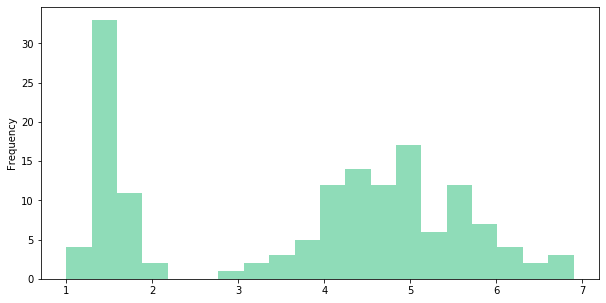

In [4]:
data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### Есть выброс "petal.length" в диапазоне примерно 1..1.9

### Зафиксируем исходные данные до заполнения NaN 

In [5]:
with_outliers = data["petal.length"].head(20).copy()
before_NaN = data["petal.width"].iloc[25:42].copy()

### Заменяем  выброс "petal.length" расчетными данными

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


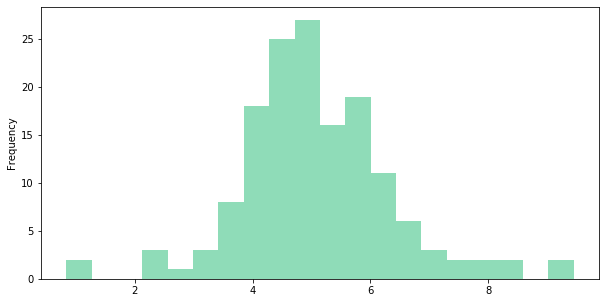

In [6]:
data["petal.length"][data["petal.length"]<=2.8] = np.random.normal(loc=5.0, 
                                                        scale=data["petal.length"].std(), 
                                                        size=len(data["petal.length"][data["petal.length"]<=2.8]))
data["petal.length"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [7]:
display(pd.DataFrame(list(zip(with_outliers, data["petal.length"].head(20))),
                   columns=["With_outliers", "After_norm"]))

,With_outliers,After_norm
0,1.4,6.141739
1,1.4,4.735491
2,1.3,9.449367
3,1.5,4.800832
4,1.4,4.747020
5,1.7,7.202565
6,1.4,6.065796
7,1.5,6.969151
8,1.4,2.547444
9,1.5,8.506580


###### Выброс исчез

## Построение гистограмы для "petal.width"

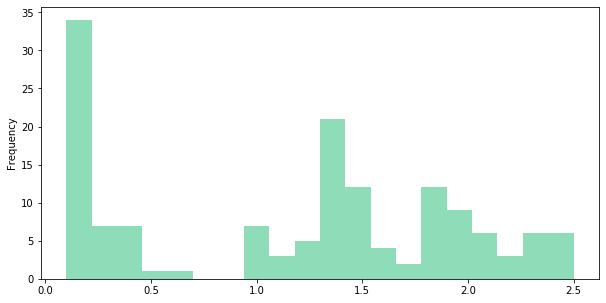

In [8]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### убеждаемся в наличии NaN

In [9]:
data["petal.width"][data["petal.width"].isnull()]

145   NaN
146   NaN
147   NaN
148   NaN
Name: petal.width, dtype: float64

### Заполняем пропуски

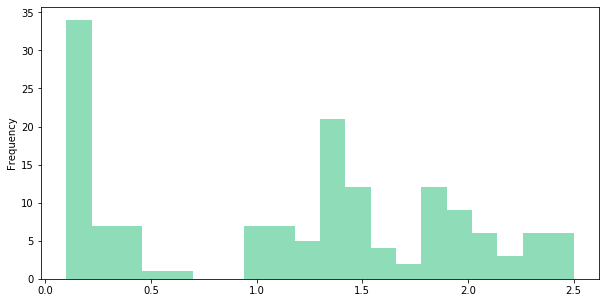

In [10]:
data["petal.width"].fillna(data["petal.width"].mean() 
                           + data["petal.width"].std()*np.random.randint(low=-2, high=2, size=1)[0], 
                          inplace=True)
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [11]:
data["petal.width"].tail(7)

143    2.300000
144    2.500000
145    1.173973
146    1.173973
147    1.173973
148    1.173973
149    1.800000
Name: petal.width, dtype: float64

### добавим еще пропусков (примерно 1/6)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


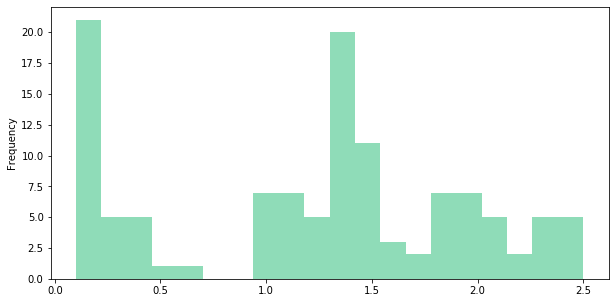

In [12]:
data["petal.width"].iloc[125:139] = None
data["petal.width"].iloc[25:42] = None
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

In [13]:
data["petal.width"].iloc[25:42]

25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
Name: petal.width, dtype: float64

### Подготовка корректирующих значений

In [14]:
df_corr = pd.DataFrame(np.random.normal(loc=data["petal.width"].mean(),
                                scale=data["petal.width"].std(), 
                                size=len(data["petal.width"])),
                      columns = ["petal.width"]) 
                                
df_corr                      

,petal.width
0,1.335346
1,0.706954
2,0.680857
3,1.740674
4,0.571734
...,...
145,0.912875
146,0.795788
147,0.982730
148,0.465236


### Заполняем пропуски

In [15]:
data.fillna(value=df_corr, inplace=True)
display(pd.DataFrame(list(zip(before_NaN, data["petal.width"].iloc[25:42])),
                   columns=["before_set_NaN", "After_filling"]))

,before_set_NaN,After_filling
0,0.2,2.211551
1,0.4,0.090057
2,0.2,2.161624
3,0.2,1.389869
4,0.2,1.929948
5,0.2,1.706026
6,0.4,2.614993
7,0.1,0.960944
8,0.2,1.597577
9,0.2,1.299020


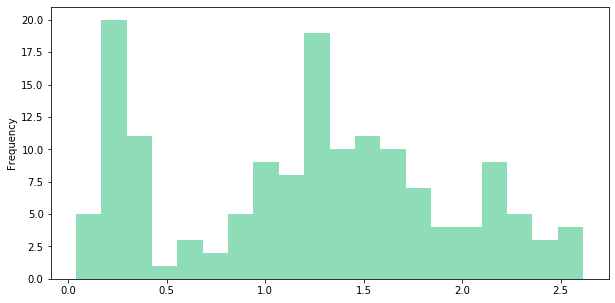

In [16]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );

### Почти похоже на исходный :-)

### Снова генерируем пропуски, но в этот раз удаляем 

In [17]:
data["petal.width"].iloc[125:147] = None
data.tail(10)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,NaN,Virginica
141,6.9,3.1,5.1,NaN,Virginica
142,5.8,2.7,5.1,NaN,Virginica
143,6.8,3.2,5.9,NaN,Virginica
144,6.7,3.3,5.7,NaN,Virginica
145,6.7,3.0,5.2,NaN,Virginica
146,6.3,2.5,5.0,NaN,Virginica
147,6.5,3.0,5.2,1.173973,Virginica
148,6.2,3.4,5.4,1.173973,Virginica
149,5.9,3.0,5.1,1.800000,Virginica


In [18]:
data.dropna(inplace=True)
data.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
118,7.7,2.6,6.9,2.300000,Virginica
119,6.0,2.2,5.0,1.500000,Virginica
120,6.9,3.2,5.7,2.300000,Virginica
121,5.6,2.8,4.9,2.000000,Virginica
122,7.7,2.8,6.7,2.000000,Virginica
123,6.3,2.7,4.9,1.800000,Virginica
124,6.7,3.3,5.7,2.100000,Virginica
147,6.5,3.0,5.2,1.173973,Virginica
148,6.2,3.4,5.4,1.173973,Virginica
149,5.9,3.0,5.1,1.800000,Virginica


### "Пропали" все строки с пропусками

## Заполняем смешанные пропуски
####...но сначала их создадим ))

In [19]:
display(data.head())
data.iloc[0:3] = None
display(data.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,6.141739,0.2,Setosa
1,4.9,3.0,4.735491,0.2,Setosa
2,4.7,3.2,9.449367,0.2,Setosa
3,4.6,3.1,4.800832,0.2,Setosa
4,5.0,3.6,4.747020,0.2,Setosa


,sepal.length,sepal.width,petal.length,petal.width,variety
0,NaN,NaN,NaN,NaN,None
1,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,None
3,4.6,3.1,4.800832,0.2,Setosa
4,5.0,3.6,4.747020,0.2,Setosa


In [20]:
values = {"sepal.length": data["sepal.length"][data["variety"]=="Setosa"].mean(),
          "sepal.width": data["sepal.width"][data["variety"]=="Setosa"].mean(), 
          "petal.length": data["petal.length"][data["variety"]=="Setosa"].median(), 
          "petal.width": data["petal.width"][data["variety"]=="Setosa"].median(),
          "variety": "Setosa"}
data.fillna(value=values, inplace=True)
display(data.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.012766,3.440426,5.343414,0.3,Setosa
1,5.012766,3.440426,5.343414,0.3,Setosa
2,5.012766,3.440426,5.343414,0.3,Setosa
3,4.600000,3.100000,4.800832,0.2,Setosa
4,5.000000,3.600000,4.747020,0.2,Setosa


## Extra case. Infinity

In [21]:
data["petal.width"].iloc[15:19] = np.array((np.inf, -np.inf, np.inf, np.log(0)))
data.iloc[15:19]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,4.811786,inf,Setosa
16,5.4,3.9,4.486485,-inf,Setosa
17,5.1,3.5,9.349164,inf,Setosa
18,5.7,3.8,6.318368,-inf,Setosa


### Гистограмма не строится при наличии inf

In [22]:
data["petal.width"].describe()

count    128.000000
mean            NaN
std             NaN
min            -inf
25%        0.575000
50%        1.300000
75%        1.707802
max             inf
Name: petal.width, dtype: float64

In [23]:
data["petal.width"].plot.hist( figsize=(10,5), 
                color='#21BA72', alpha=0.5, bins=20 );
# Ой! Что-то пойдет не так!

ValueError: autodetected range of [-inf, inf] is not finite

## Заменяем inf и -inf на NaN

In [24]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.iloc[14:20]

,sepal.length,sepal.width,petal.length,petal.width,variety
14,5.8,4.0,5.795015,0.2,Setosa
15,5.7,4.4,4.811786,NaN,Setosa
16,5.4,3.9,4.486485,NaN,Setosa
17,5.1,3.5,9.349164,NaN,Setosa
18,5.7,3.8,6.318368,NaN,Setosa
19,5.1,3.8,2.238922,0.3,Setosa


### а дальше дело техники...

# Устранение пропусков в линиях/рядах

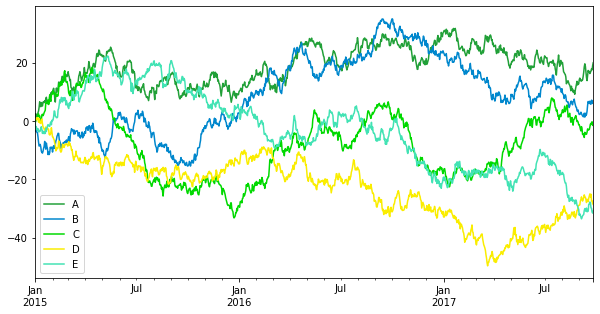

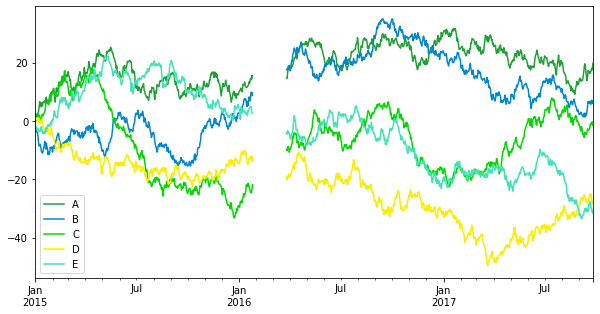

In [99]:
sbercolors = ['#21A038','#0087CD','#00D900', '#FAED00',  '#42E3B4','#21BA72'] 
image_params = dict(figsize=(10,5), 
                color=sbercolors)
samples = np.random.randn(1000, 5)

df = pd.DataFrame(samples, 
                   index=pd.date_range("1/1/2015", periods=1000),
                   columns=list("ABCDE"))
df = df.cumsum()
df.plot(**image_params);    
before = df.iloc[400:420].copy()        
df.iloc[390:450] = None

df.plot(**image_params);
  

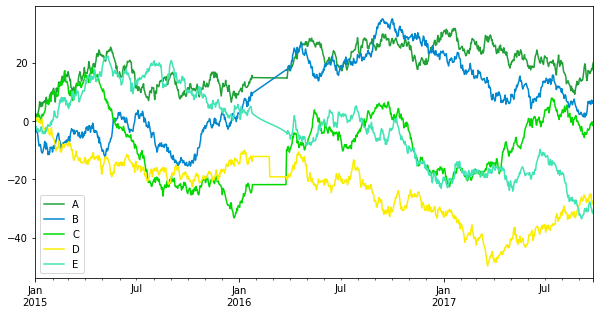

In [101]:
to_fill = {"A": df["A"].interpolate(method='linear'),
           "B": df["B"].interpolate(method='time'),
           "C": df["C"].interpolate(method='pad'),
           "D": df["D"].interpolate(method='nearest'),
           "E": df["E"].interpolate(method='akima'),}
df.fillna(value=to_fill, inplace=True)
df.plot(**image_params);


In [102]:
to_check = pd.concat((before,df.iloc[400:420]), axis=1)
to_check.columns = pd.MultiIndex.from_product([['Before', 'Recycled'], df.columns,],
                                     names=['subject', 'type'])

display(to_check) 

subject        Before                                              Recycled  \
type                A          B          C          D         E          A   
2016-02-05  16.282237   8.754095 -21.350996 -12.291430 -2.119740  14.799962   
2016-02-06  15.732993   9.506655 -21.470054 -11.306594 -1.417651  14.797551   
2016-02-07  16.341566  10.280563 -20.145046 -10.926068 -0.980276  14.795141   
2016-02-08  16.816436  10.854803 -21.734716  -9.646960 -1.000550  14.792731   
2016-02-09  15.804111  10.079764 -21.730914 -11.051953 -0.242692  14.790321   
2016-02-10  15.149592  10.525123 -20.664490 -10.384619  0.121274  14.787911   
2016-02-11  15.947348   9.479950 -19.404815  -9.034351  0.021709  14.785500   
2016-02-12  16.511291   8.701615 -20.226918  -9.463179 -1.223252  14.783090   
2016-02-13  19.110664   9.264768 -21.540206  -9.661282 -0.680117  14.780680   
2016-02-14  19.542321  11.372064 -22.058166  -8.898659 -2.786693  14.778270   
2016-02-15  19.984530  10.450963 -21.587280  -9.352332 -4.610643  14.775860   
2016-02-16  20.410045  12.617804 -23.158182  -9.479171 -4.613833  14.773449   
2016-02-17  19.170901  11.962688 -21.803722  -9.925844 -4.301769  14.771039   
2016-02-18  19.473232  14.669881 -21.255186  -9.960226 -4.835919  14.768629   
2016-02-19  18.892155  13.090427 -21.324256 -10.872933 -5.185454  14.766219   
2016-02-20  18.436083  14.213217 -19.948045 -11.727301 -5.135294  14.763809   
2016-02-21  15.756672  13.508251 -19.855437 -10.828336 -6.877760  14.761398   
2016-02-22  14.102786  14.613264 -19.169795  -9.263693 -6.442491  14.758988   
2016-02-23  14.621574  15.270749 -19.139175  -9.290698 -6.643949  14.756578   
2016-02-24  12.927209  17.345680 -16.583790 -10.168320 -6.757153  14.754168   

subject                                                
type                B          C          D         E  
2016-02-05  10.957799 -21.843762 -12.206274  0.993358  
2016-02-06  11.090858 -21.843762 -12.206274  0.876969  
2016-02-07  11.223916 -21.843762 -12.206274  0.763645  
2016-02-08  11.356975 -21.843762 -12.206274  0.653232  
2016-02-09  11.490033 -21.843762 -12.206274  0.545576  
2016-02-10  11.623091 -21.843762 -12.206274  0.440525  
2016-02-11  11.756150 -21.843762 -12.206274  0.337924  
2016-02-12  11.889208 -21.843762 -12.206274  0.237621  
2016-02-13  12.022266 -21.843762 -12.206274  0.139462  
2016-02-14  12.155325 -21.843762 -12.206274  0.043294  
2016-02-15  12.288383 -21.843762 -12.206274 -0.051037  
2016-02-16  12.421442 -21.843762 -12.206274 -0.143683  
2016-02-17  12.554500 -21.843762 -12.206274 -0.234800  
2016-02-18  12.687558 -21.843762 -12.206274 -0.324539  
2016-02-19  12.820617 -21.843762 -12.206274 -0.413054  
2016-02-20  12.953675 -21.843762 -12.206274 -0.500498  
2016-02-21  13.086733 -21.843762 -12.206274 -0.587026  
2016-02-22  13.219792 -21.843762 -12.206274 -0.672790  
2016-02-23  13.352850 -21.843762 -12.206274 -0.757943  
2016-02-24  13.485909 -21.843762 -12.206274 -0.842640